### MNIST
### DataLoader, Transformations
### Multilayer Neural Net, activation functions
### Loss and optimizer
### Training loop (batch training)
### Model evaluation
### GPU support

In [1]:
import torch
import torch.nn as nn
import torchvision # for the datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

### Device config

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Defining hyperparamters

In [3]:
input_size = 784   # 28x28    .....will flatten this array to a 1d tensor...
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

### MNIST Dataset, DataLoader and transformations

In [4]:
train_dataset = torchvision.datasets.MNIST(root='./data', train = True, transform=transforms.ToTensor(), download = True)

test_dataset = torchvision.datasets.MNIST(root='./data', train = False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle = False)

### Example....

In [5]:
example = iter(train_loader)
samples, labels = example.next()
print(samples.shape,'\n', labels.shape)

torch.Size([100, 1, 28, 28]) 
 torch.Size([100])


In [6]:
print(samples[99].shape)
print(samples[99][0].shape)

torch.Size([1, 28, 28])
torch.Size([28, 28])


In [7]:
print(labels[99])

tensor(9)


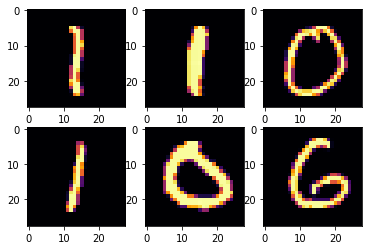

In [8]:
for i in range(6):
    plt.subplot(2, 3, i+1) # 2 rows and 3 columns and index
    plt.imshow(samples[i][0], cmap = 'inferno')
    
# plt.show()

---

### Multilayer Neural Net and activation functions

In [9]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes): # The output size is the number of classes...
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        
        # we dont apply the softmax here....because we'll be using the cross-entropy loss and it will apply it for us....
        
        return out
    
# P.S - send the model to the device
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

### SIDENOTE - The model and the data goes to the device...

### The loss and the optimizer

In [10]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate) # model parameters has weights and biases....initiated after calling optimizer.step()...

### Training loop...

In [11]:
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader): # i is the index, and the tuple has the data...
        # Reshaping the images .......[100, 1, 28, 28] -----> [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)


        #forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        #backward
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

epoch 1 / 2, step 100/600, loss = 0.4535
epoch 1 / 2, step 200/600, loss = 0.4514
epoch 1 / 2, step 300/600, loss = 0.1574
epoch 1 / 2, step 400/600, loss = 0.2934
epoch 1 / 2, step 500/600, loss = 0.2426
epoch 1 / 2, step 600/600, loss = 0.1668
epoch 2 / 2, step 100/600, loss = 0.2255
epoch 2 / 2, step 200/600, loss = 0.2046
epoch 2 / 2, step 300/600, loss = 0.2333
epoch 2 / 2, step 400/600, loss = 0.1140
epoch 2 / 2, step 500/600, loss = 0.2434
epoch 2 / 2, step 600/600, loss = 0.1188


### Test

In [12]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        # torch.max will return the value and the index...
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        # batchwise increment
        n_correct += (predictions == labels).sum().item()
        
    acc = 100.0 * n_correct / n_samples
    
    print(f'accuracy = {acc}')

accuracy = 95.49


---